### Import Liberaries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
import sys
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.model_selection import train_test_split
#import dowhy
#from dowhy import CausalModel
from IPython.display import Image, display
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')


In [8]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preProcessor import DfOutlier
from file_manage import FileHandler
manage_file = FileHandler()


### Read the dataset

In [9]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
data["Unnamed: 32"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

**The column named `Unnamed: 32` has no data, so it will be the first to dropout of the data set**

In [13]:
# 
data = data.drop('Unnamed: 32', axis =1)
data.shape

(569, 32)

***The Dataset have 569 rows and 32 Columns***

In [14]:
df = data.copy()

In [15]:
manage_outlier = DfOutlier(df)

In [16]:
df.isnull().values.any()

False

In [17]:
#df.isnull().values.sum()

***It looks there are no NAN values in our data set***

In [18]:
df['diagnosis'].agg(['count', 'size', 'nunique'])

count      569
size       569
nunique      2
Name: diagnosis, dtype: int64

In [19]:
pd.value_counts(df['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

In [20]:
y = df.diagnosis # M or B
x = df.drop(['id', 'diagnosis'], axis=1)

In [40]:
sys.path.append(os.path.abspath(os.path.join('../plots')))

***Lets Visualize this catagorical data with much better way***

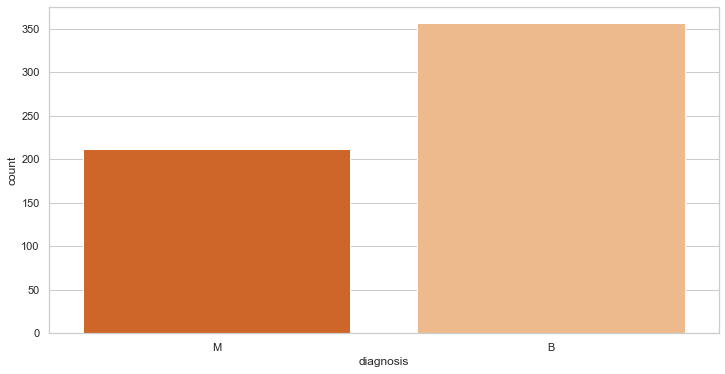

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="diagnosis", data=df, palette='Oranges_r')
plt.savefig('../plots/catagoris of diagnosis.png')

#### Lets see the general statistics of our data if we get some insights

In [22]:
#data = data.drop('Unnamed: 32', axis =1)
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


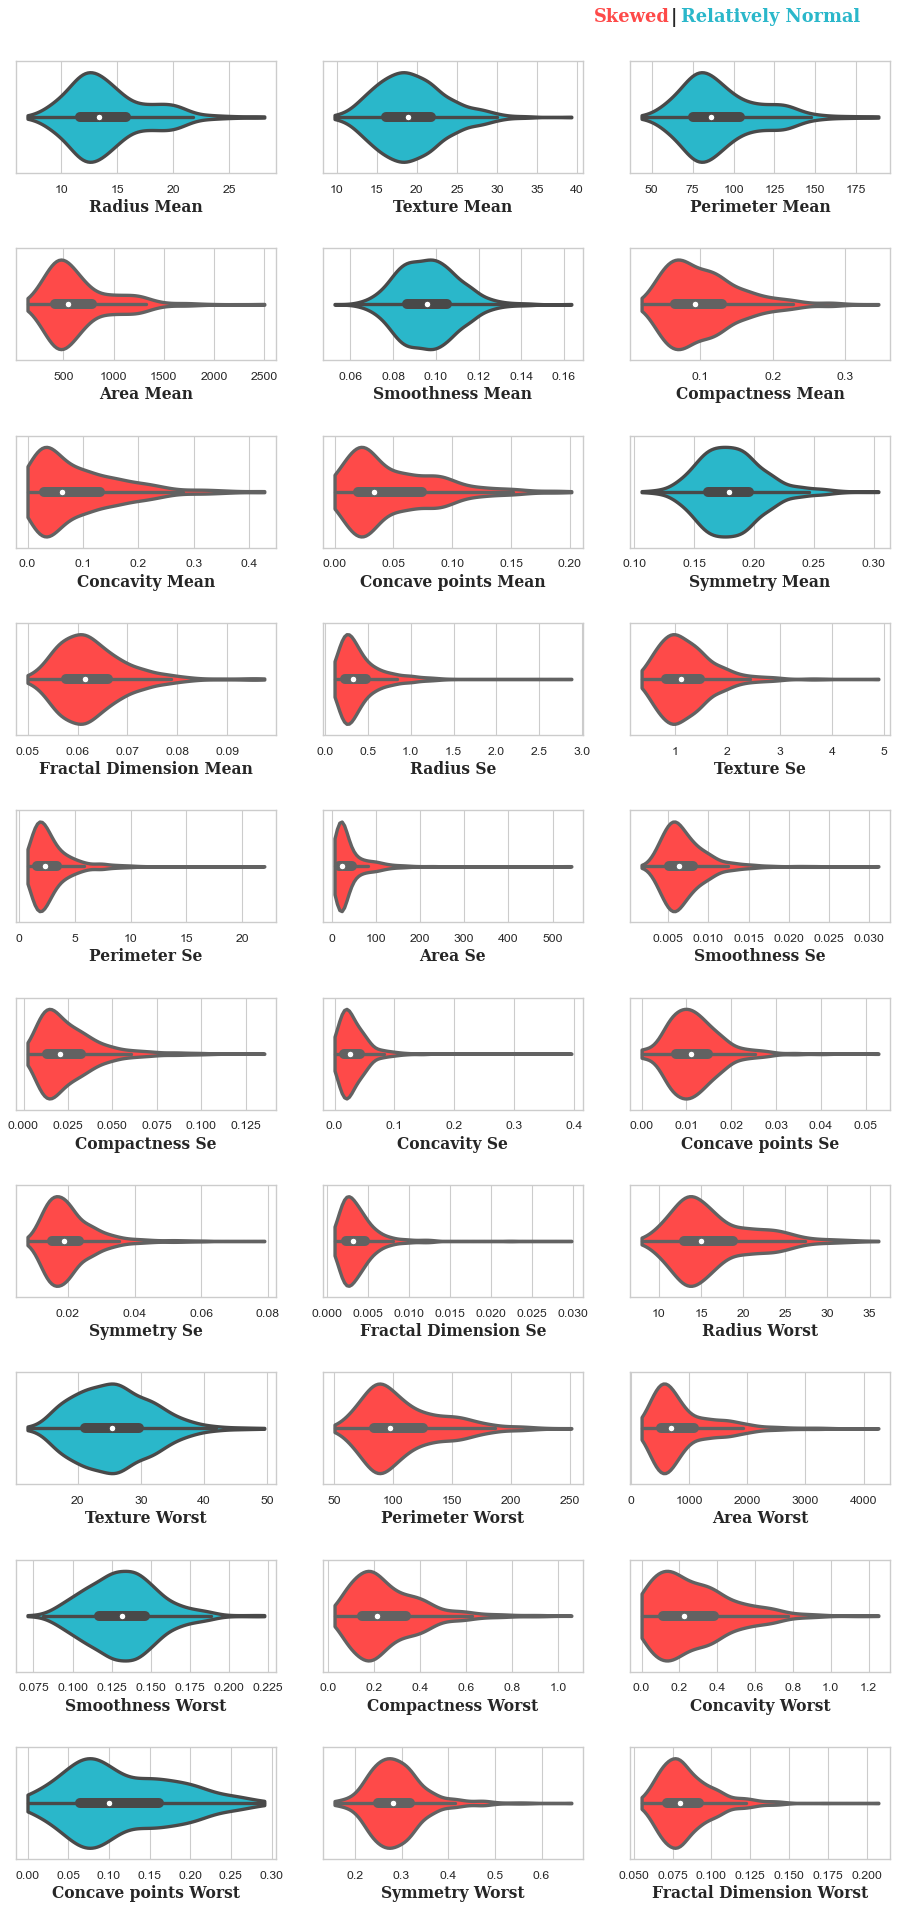

In [43]:
colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # skewness
    if skew(x[col])>1:
        color = colors[0]
    else:
        color = colors[1]

    ## plots
    sns.violinplot(x[col], ax =ax,
                   color = color, cut =0,
                   inner = 'box',
                   alpha = 1,linewidth = 3, edgecolor = 'solidblack', saturation =1 )

    ## plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':14, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 3,h_pad = 2.5, w_pad = 2.5)

fig.text(0.65,1, "Skewed",{'font':'serif','size':16, 'weight':'bold', 'color':colors[0]})
fig.text(0.73,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.74,1, "Relatively Normal",{'font':'serif','size':16, 'weight':'bold','color':colors[1]})

fig.show()
plt.savefig('../plots/vaiolin plots.png')

#### Lets see the the date labels(catagorical) and numerical datas separaty

In [24]:
'''y = df.diagnosis
list = ['id','diagnosis']
x = df.drop(list,axis = 1 )'''
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


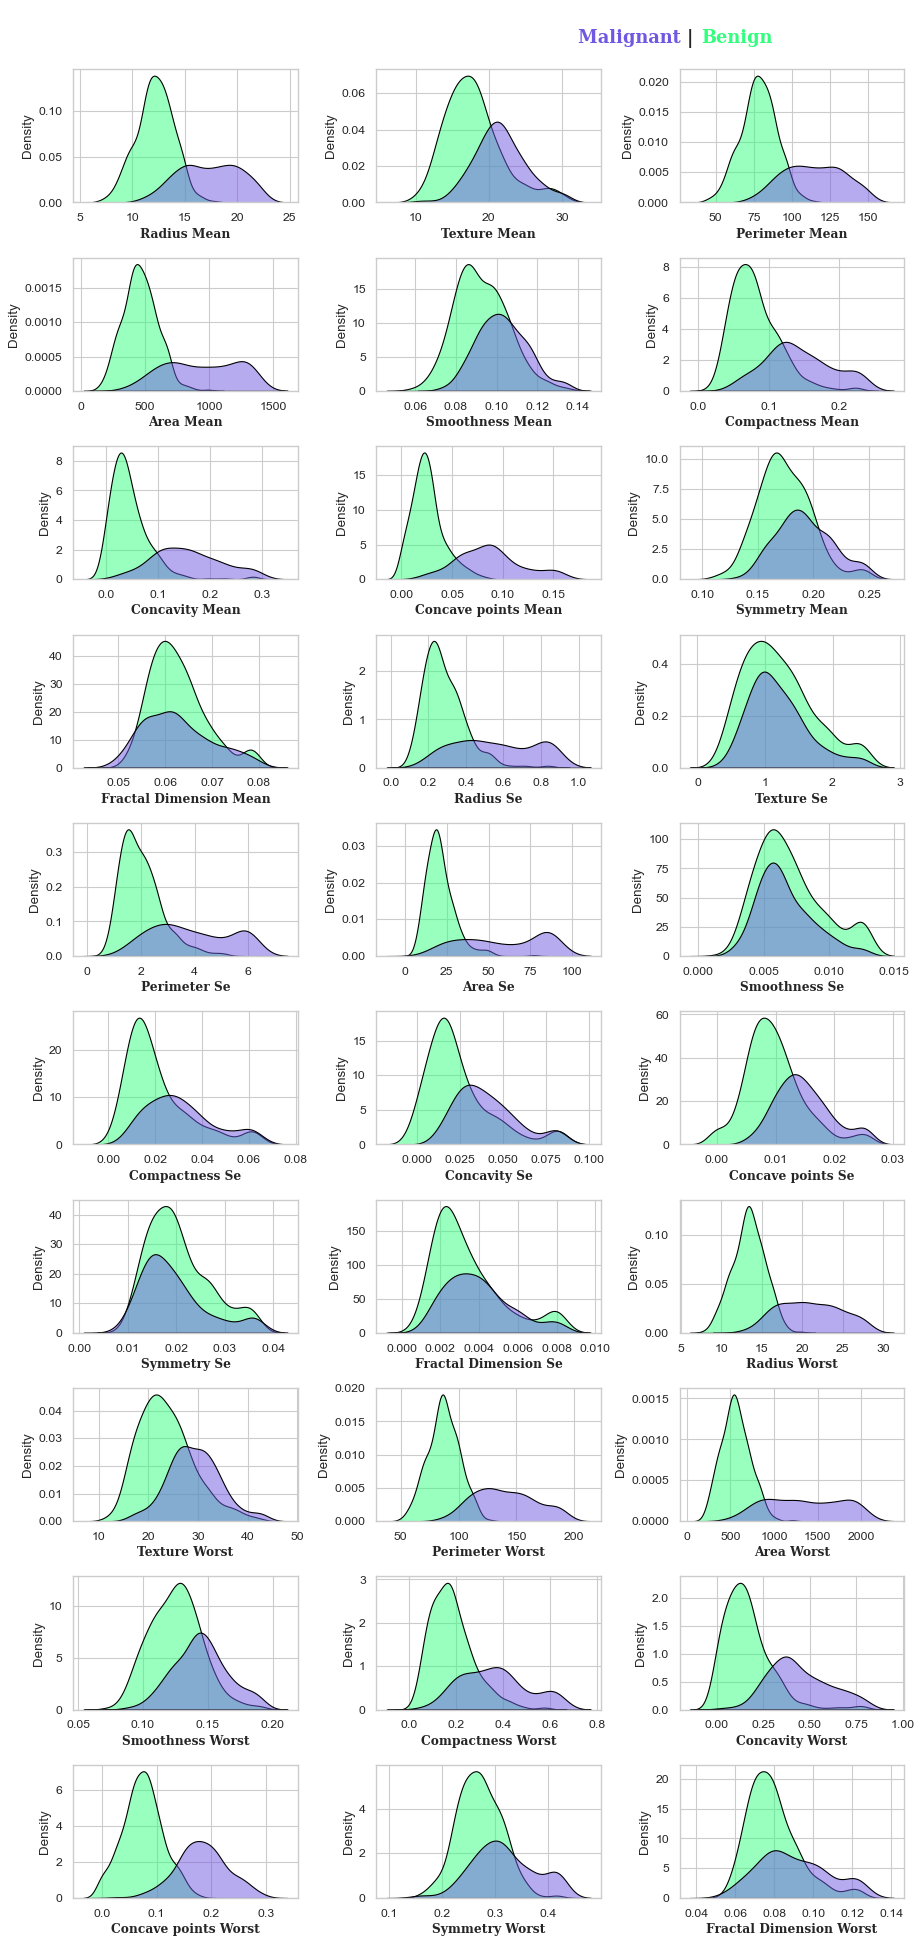

In [44]:
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # plots
    sns.kdeplot(df[col], ax = ax, shade = True ,
                palette=["#7158e2", "#32ff7e"],
                alpha = 0.5, linewidth = 1, ec = 'black',
                hue = df['diagnosis'], hue_order = ['M','B'],
                legend = False)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':11, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 2,h_pad = 1, w_pad = 1)

fig.text(0.615,1, "\n Malignant",{'font':'serif','size':16, 'weight':'bold', 'color':"#7158e2"}, alpha = 1)
fig.text(0.735,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.75,1, "Benign",{'font':'serif','size':16, 'weight':'bold','color':"#32ff7e"}, alpha = 1)

fig.show()
plt.savefig('../plots/distribution of diagnosis catagoris.png')

### Lets apply normalization or standirdization and then visualization

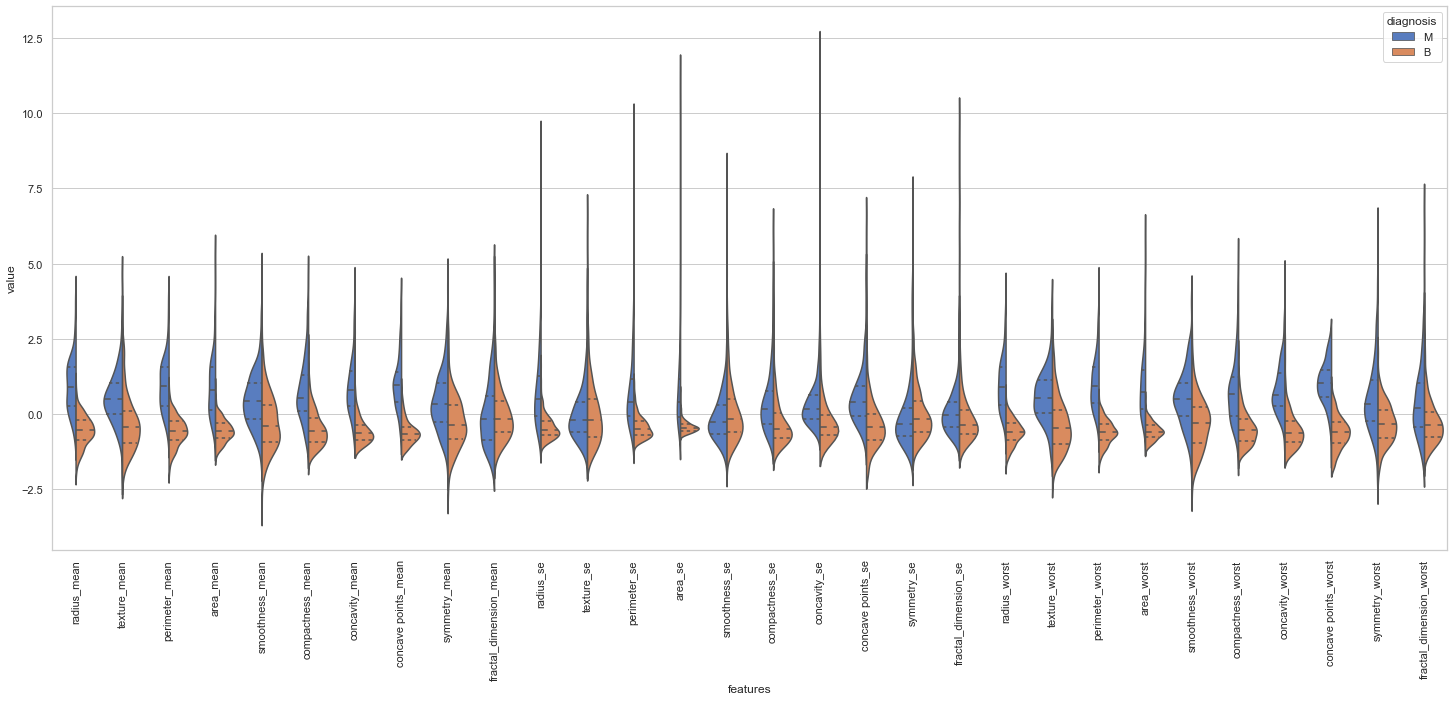

In [45]:
# features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.savefig('../plots/all features in violin.png')

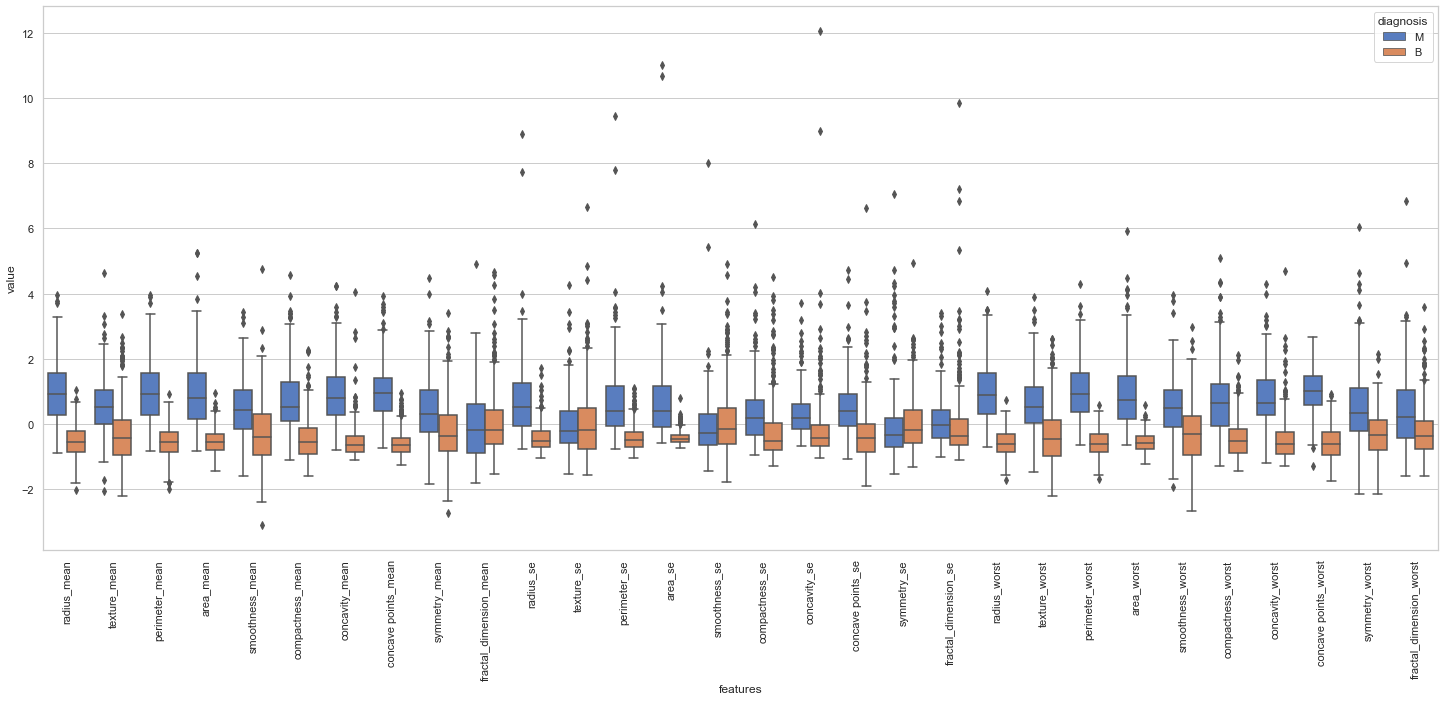

In [46]:
plt.figure(figsize=(25,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.savefig('../plots/box plot of features.png')


## Bivariate Analysis

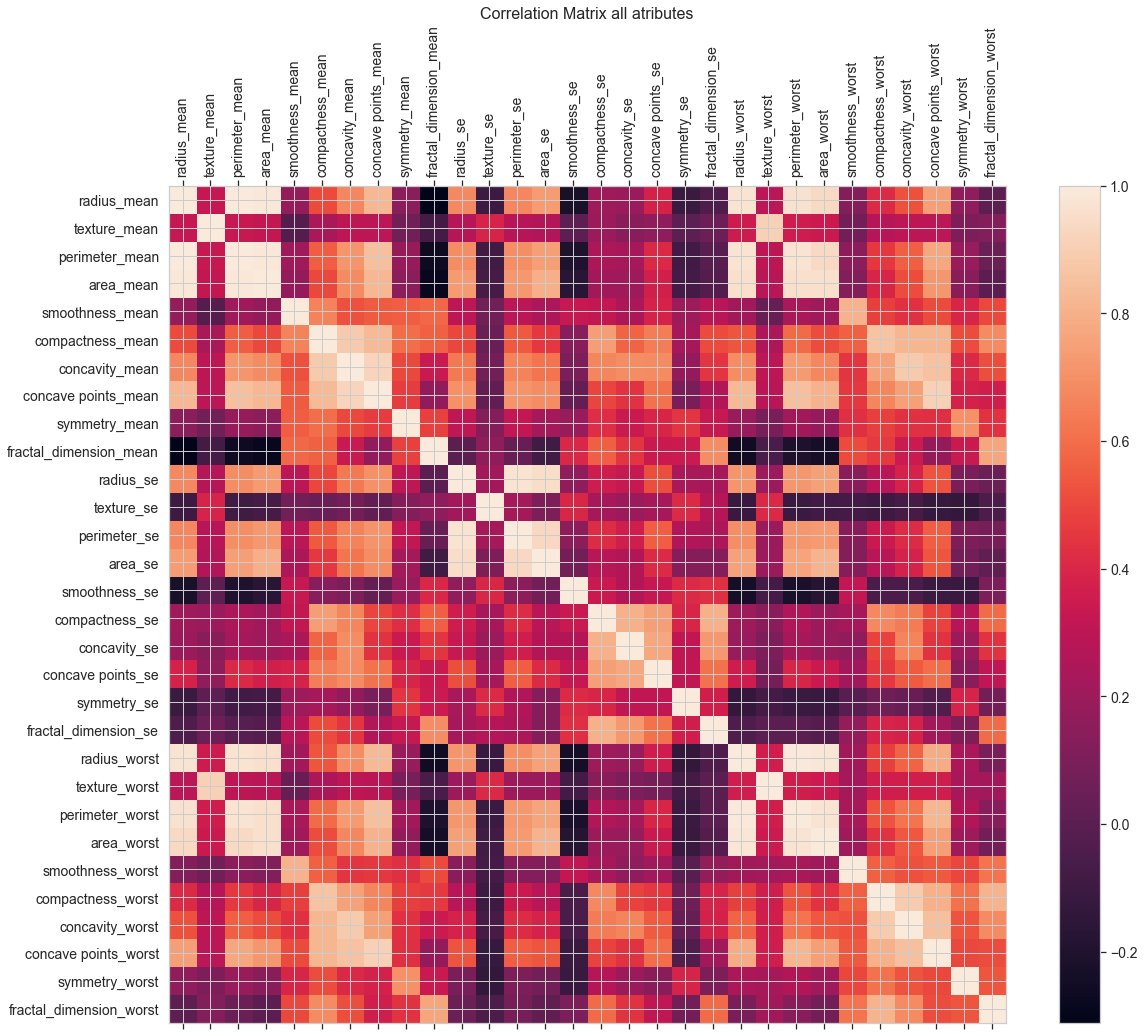

In [47]:
f = plt.figure(figsize=(19, 15))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix all atributes', fontsize=16)
plt.savefig('../plots/box plot of features_2.png')

**From the result we can see that:** 
- There are many negative and positive correlations in this dataset.
- `Negative Correlations`:- The column `fractal_dimension_mean` had many negative correlations with many different attributes like 'area_mean', 'area_worst' etc.

#### Lets try to create a better visuallization features with `mean values`, `standard error` and `worst` cases respectively

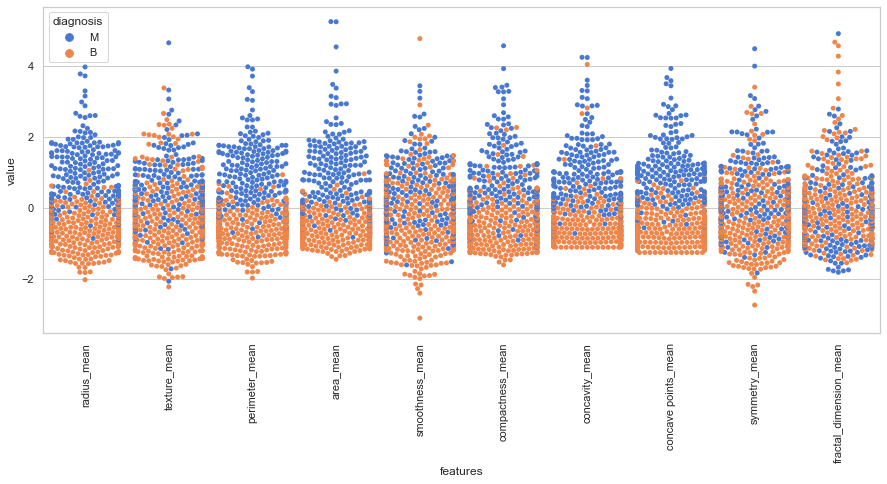

In [48]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,6))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis",data=data)

plt.xticks(rotation=90)
plt.savefig('../plots/leaf plot of features.png')

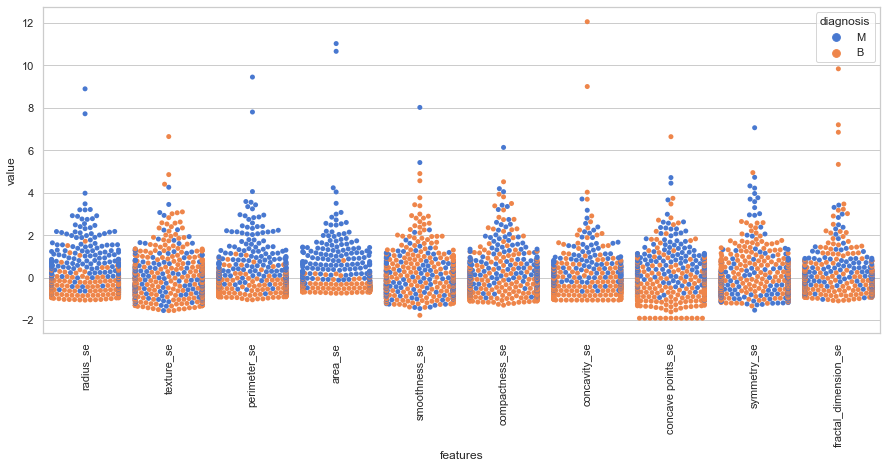

In [49]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,6))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.savefig('../plots/leaf plot of features_2.png')

**Observation:-** `smoothness_se` in this swarm plot looks like `Malignant` and `Benign` are mixed and it is hard to classfy while using this feature.

swarm plot time:  45.28889083862305  s


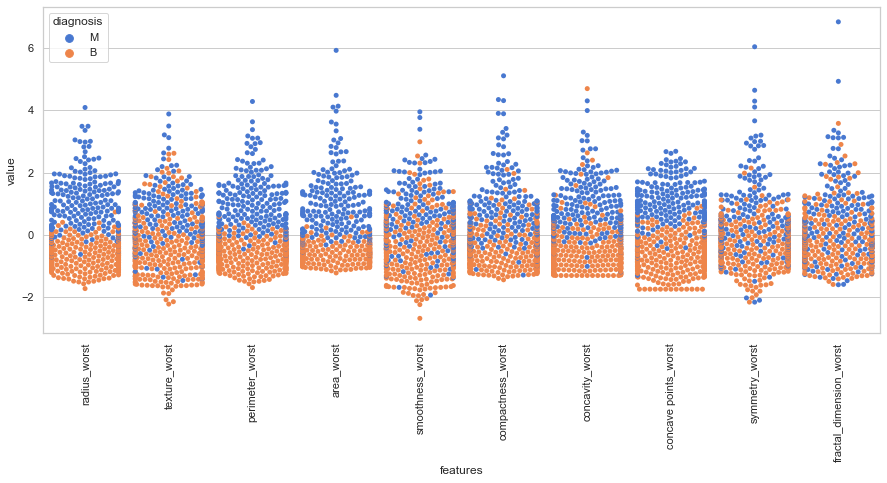

In [50]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,6))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")
plt.savefig('../plots/leaf plot of features_3.png')

 **Observation**:- In this plot `area_worst` looks like Malignant and Benign are mostly seprated.

***✨ It looks difficult to see the correlation of all atributes on the data set but we can see that there are more attributes to be checked from the result***

**Let's see it in numerical pattren**

In [32]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Manage outliers

In [33]:
manage_outlier.replace_outliers_with_fences(x.columns)

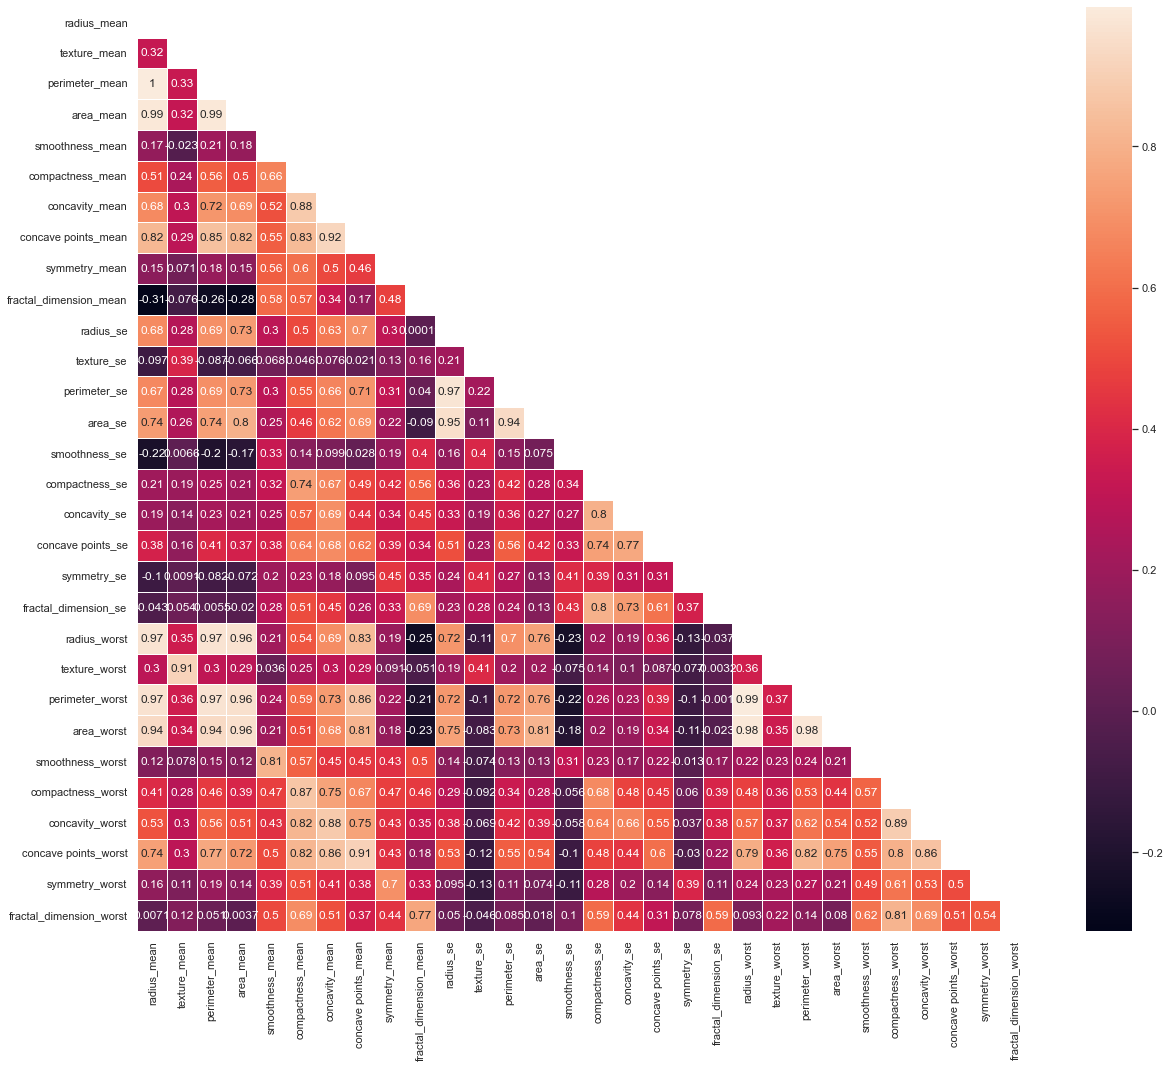

In [51]:
plt.figure(figsize=(20, 17))
matrix = np.triu(x.corr())
sns.heatmap(x.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")
plt.savefig('../plots/correlation.png')

#### It looks we have enough visualizations about our data set features, so lets generate some question to drive us to feature selection
- See you in the next `feature_selection` notebook

In [35]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:

manage_file.to_csv(manage_outlier.df, '../data/data_v2.csv')